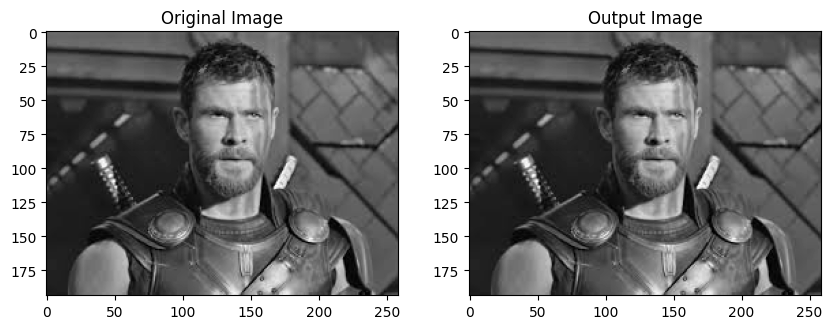

In [ ]:
#TASK1
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the grayscale image
image = cv2.imread("/content/Image1.jpeg", cv2.IMREAD_GRAYSCALE)

# Define a 3x3 identity kernel
identity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

# Apply the kernel using cv2.filter2D
output_image = cv2.filter2D(image, -1, identity_kernel)

# Display the original and the output images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Output Image")
plt.imshow(output_image, cmap='gray')
plt.show()


## **The output image will look almost identical to the original grayscale image because the identity kernel preserves the pixel values without introducing changes. This serves as a validation that the convolution function is applied correctly. Since cv2.filter2D automatically pads the input image (using methods like zero-padding or border replication), the convolution operation with an identity kernel does not lose any edge information. Thus, the input and output images are completely identical.**







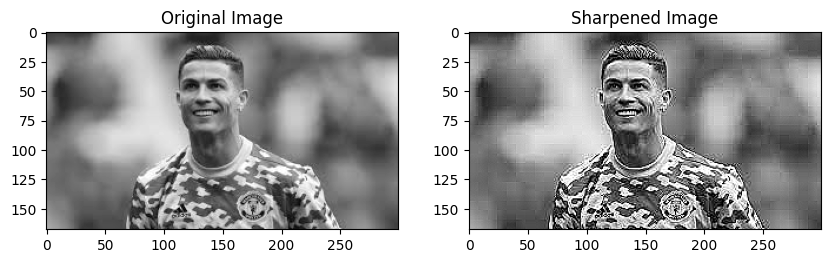

In [ ]:
#TASK2

# Load the image (grayscale)
ld = cv2.imread("image2.jpeg", cv2.IMREAD_GRAYSCALE)

# Define the sharpening kernel
sharpening_kernel = np.array([[ 0, -1,  0],
                               [-1,  5, -1],
                               [ 0, -1,  0]])

# Apply the kernel using cv2.filter2D
sharpened_image = cv2.filter2D(ld, -1, sharpening_kernel)

# Display the original and the sharpened images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(ld, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Sharpened Image")
plt.imshow(sharpened_image, cmap='gray')
plt.show()


**Overall Clarity:** The sharpening kernel enhances the clarity of the image by emphasizing edges and fine details. This makes textures and object boundaries more pronounced.The sharpening filter shifts the pixel value of the center pixel away from the neigboring
pixels.
**Contrast:** The image appears slightly higher in contrast because neighboring pixel values are subtracted from the central pixel, making transitions between light and dark regions more distinct.

**TASK3**


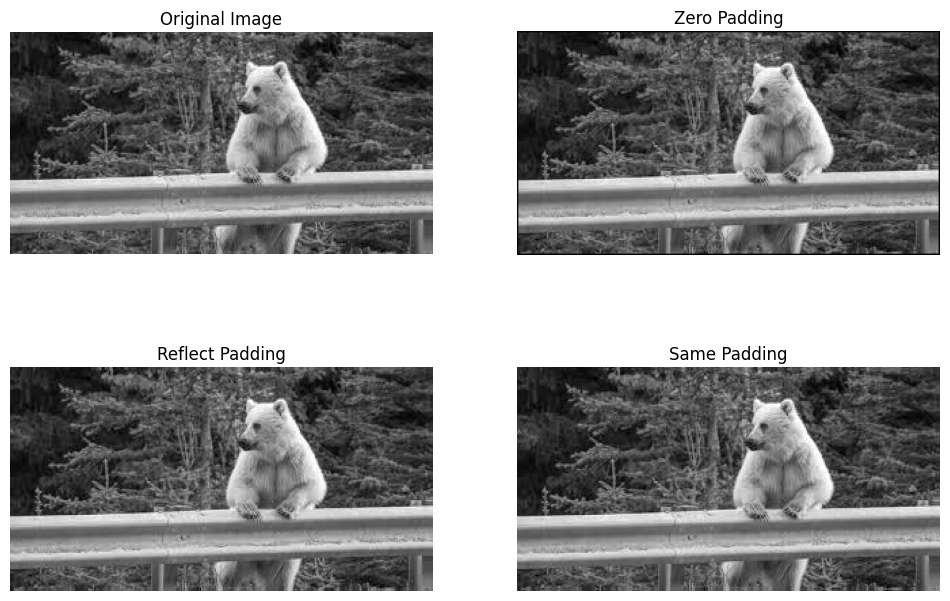

In [ ]:

image = cv2.imread("/content/image3.jpeg", cv2.IMREAD_GRAYSCALE)

image_zero_padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
image_reflect_padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REFLECT)
image_same_padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_DEFAULT)

plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Zero padding result
plt.subplot(2, 2, 2)
plt.title("Zero Padding")
plt.imshow(image_zero_padded, cmap='gray')
plt.axis('off')

# Reflect padding result
plt.subplot(2, 2, 3)
plt.title("Reflect Padding")
plt.imshow(image_reflect_padded, cmap='gray')
plt.axis('off')

# Same padding result
plt.subplot(2, 2, 4)
plt.title("Same Padding")
plt.imshow(image_same_padded, cmap='gray')
plt.axis('off')

plt.show()


Zero Padding:
**bold text**
The image is padded with black pixels (zeros) around the border.
This adds a visible black border around the image.

**Reflect Padding:**

The image is padded by reflecting the pixels at the borders.
The image will have smoother transitions near the borders, as the reflected pixels mimic the original image.
**Same Padding:**

Padding is applied in a way that ensures the output size is the same as the original image, with the padding behavior determined by default (border extension or replication).
This padding preserves the image size without introducing sharp edges or a black border.

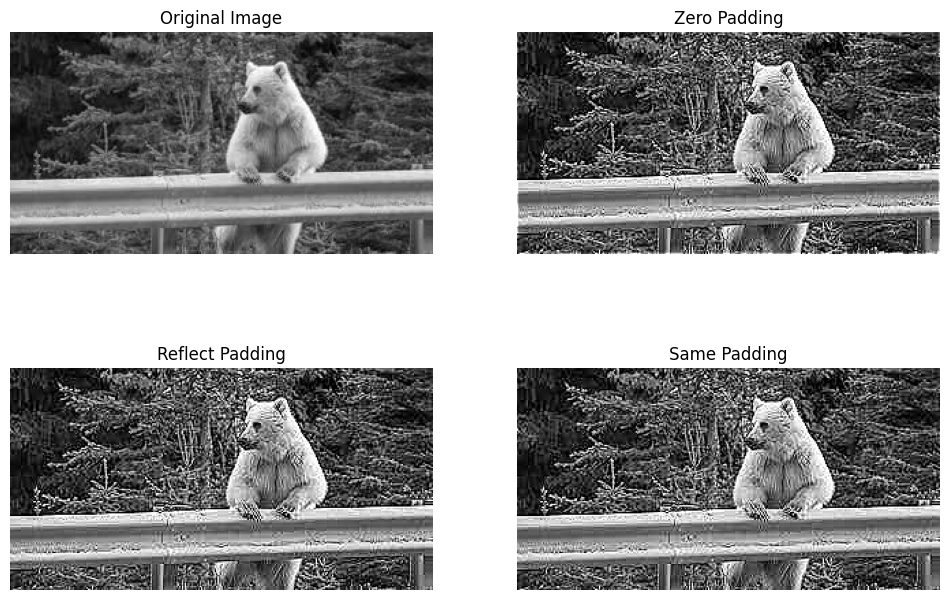

In [ ]:
image = cv2.imread("image3.jpeg", cv2.IMREAD_GRAYSCALE)
image_zero_padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
output_zero_padded = cv2.filter2D(image_zero_padded, -1, sharpening_kernel)[1:-1, 1:-1]

# Apply reflect padding
image_reflect_padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REFLECT)
output_reflect_padded = cv2.filter2D(image_reflect_padded, -1, sharpening_kernel)[1:-1, 1:-1]

# Apply same padding (image size remains unchanged, uses BORDER_DEFAULT)
image_same_padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_DEFAULT)
output_same_padded = cv2.filter2D(image_same_padded, -1, sharpening_kernel)[1:-1, 1:-1]

# Display the results
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Zero padding result
plt.subplot(2, 2, 2)
plt.title("Zero Padding")
plt.imshow(output_zero_padded, cmap='gray')
plt.axis('off')

# Reflect padding result
plt.subplot(2, 2, 3)
plt.title("Reflect Padding")
plt.imshow(output_reflect_padded, cmap='gray')
plt.axis('off')

# Same padding result
plt.subplot(2, 2, 4)
plt.title("Same Padding")
plt.imshow(output_same_padded, cmap='gray')
plt.axis('off')

plt.show()


**TASK-4**

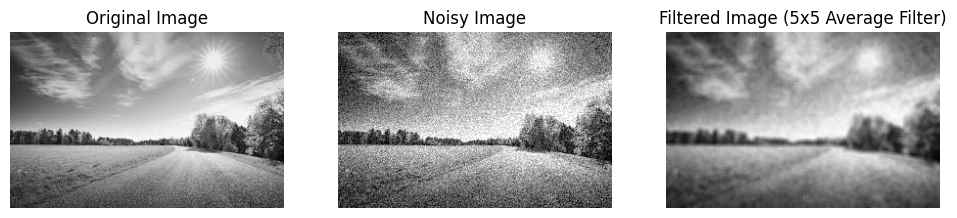

In [ ]:
image = cv2.imread("/content/image4.jpeg", cv2.IMREAD_GRAYSCALE)
def add_gaussian_noise(image, mean=0, sigma=25):
    row, col = image.shape
    gaussian_noise = np.random.normal(mean, sigma, (row, col))
    noisy_image = np.clip(image + gaussian_noise, 0, 255)
    return noisy_image.astype(np.uint8)

# Add Gaussian noise to the image
noisy_image = add_gaussian_noise(image)

# Apply a 5x5 average filter using cv2.blur
filtered_image = cv2.blur(noisy_image, (5, 5))

# Display the original, noisy, and filtered images
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Noisy image
plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

# Filtered image
plt.subplot(1, 3, 3)
plt.title("Filtered Image (5x5 Average Filter)")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()


 After applying Average Filter, the noisy image gets smooth overall. The noises get reduced, but the sharpness of the
image was affected

**Task5**

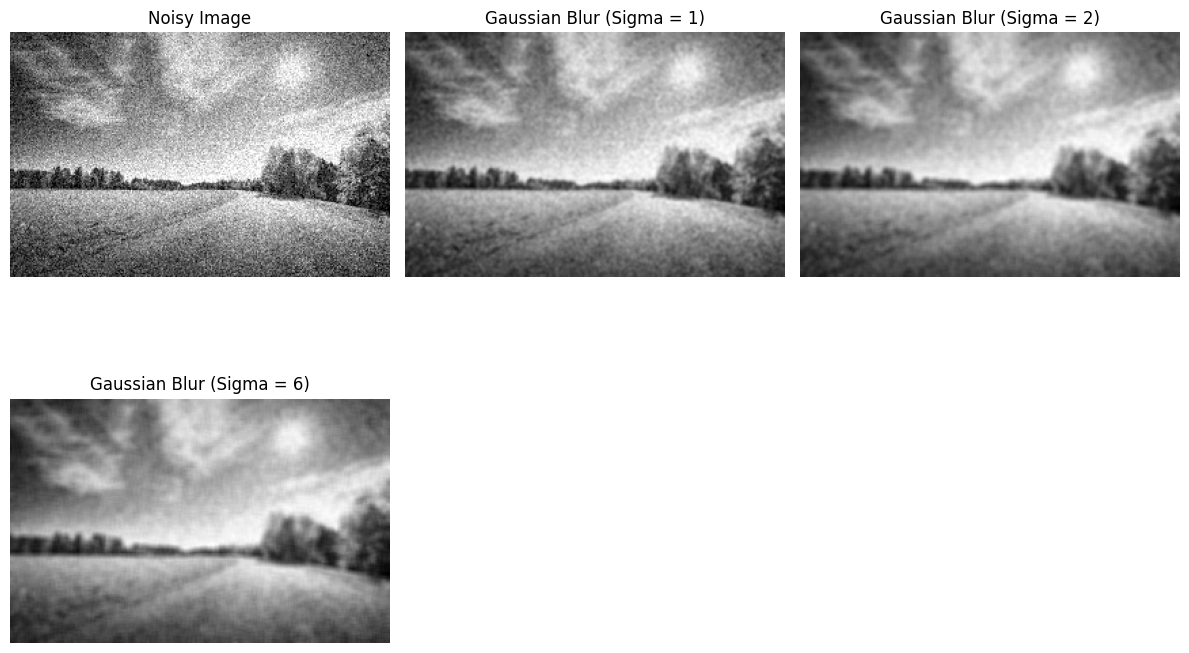

In [ ]:
# Apply Gaussian blur with different sigma values
blurred_sigma_1 = cv2.GaussianBlur(noisy_image, (5, 5), 1)  # Sigma = 1
blurred_sigma_2 = cv2.GaussianBlur(noisy_image, (5, 5), 2)  # Sigma = 2
blurred_sigma_3 = cv2.GaussianBlur(noisy_image, (5, 5), 6)  # Sigma = 6

# Display the original noisy and blurred images with different sigma values
plt.figure(figsize=(12, 8))

# Noisy image
plt.subplot(2, 3, 1)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

# Blurred image with Sigma = 1
plt.subplot(2, 3, 2)
plt.title("Gaussian Blur (Sigma = 1)")
plt.imshow(blurred_sigma_1, cmap='gray')
plt.axis('off')

# Blurred image with Sigma = 2
plt.subplot(2, 3, 3)
plt.title("Gaussian Blur (Sigma = 2)")
plt.imshow(blurred_sigma_2, cmap='gray')
plt.axis('off')

# Blurred image with Sigma = 3
plt.subplot(2, 3, 4)
plt.title("Gaussian Blur (Sigma = 6)")
plt.imshow(blurred_sigma_3, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Sigma = 1: Minimal smoothing; noise is slightly reduced, and the image retains most of its sharpness.
Sigma = 2: Increased smoothing, with more noticeable noise reduction but slight blurring of fine details.
Sigma = 6: Strong smoothing effect, significant noise reduction, but fine details and edges appear much softer.

**TASK6**

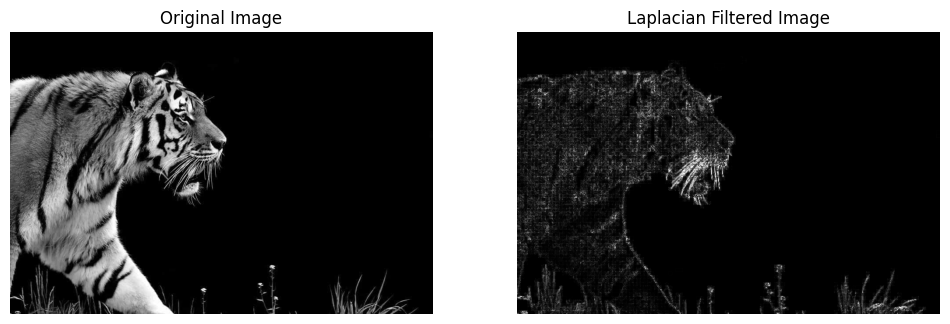

In [ ]:
image = cv2.imread("/content/image5.jpg", cv2.IMREAD_GRAYSCALE)
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Display the original and Laplacian-filtered images
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Laplacian filtered image
plt.subplot(1, 2, 2)
plt.title("Laplacian Filtered Image")
plt.imshow(laplacian_abs, cmap='gray')
plt.axis('off')

plt.show()


**TASK7**

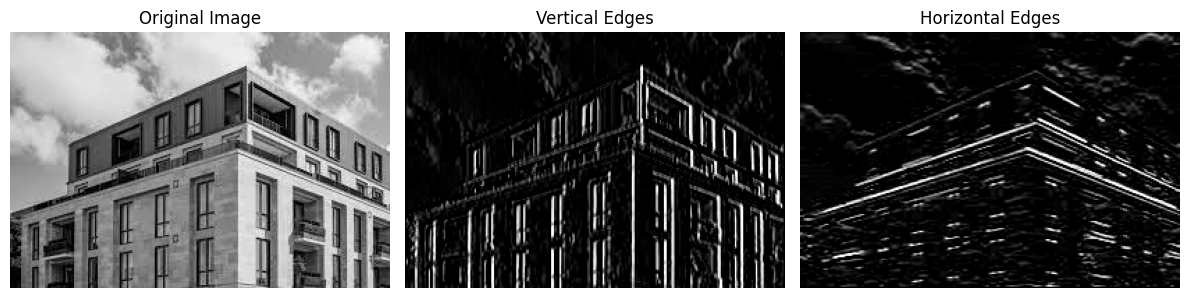

In [ ]:

image = cv2.imread('/content/image6.jpeg', cv2.IMREAD_GRAYSCALE)
vertical_kernel = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]])
horizontal_kernel = np.array([[-1, -1, -1],
                              [ 0,  0,  0],
                              [ 1,  1,  1]])
vertical_edges = cv2.filter2D(image, -1, vertical_kernel)
horizontal_edges = cv2.filter2D(image, -1, horizontal_kernel)
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Vertical Edges')
plt.imshow(vertical_edges, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Horizontal Edges')
plt.imshow(horizontal_edges, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


 Here, the Horizontal Kernel only filters the Horizontal Edges.
The Vertical Kernel only filters the Vertical Edges.

TASK8
SUBTASK1

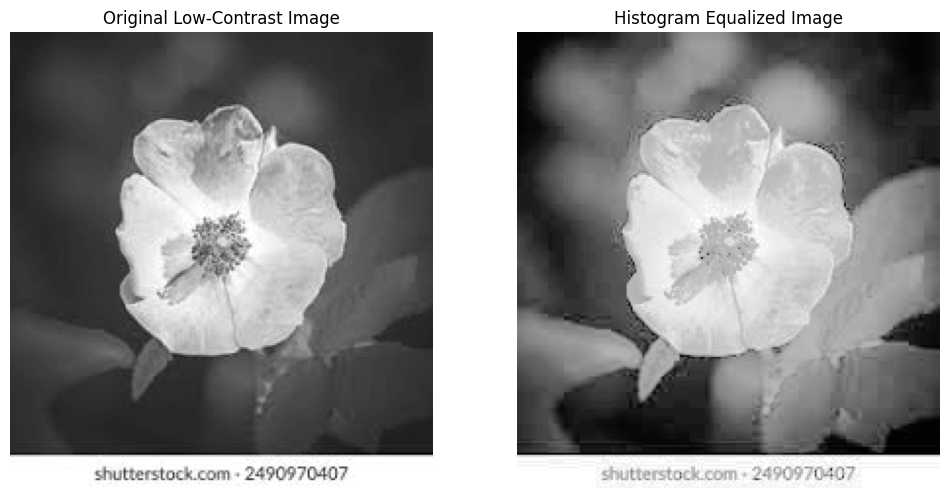

In [ ]:
image = cv2.imread("/content/image7.jpeg", cv2.IMREAD_GRAYSCALE)
equalized_image = cv2.equalizeHist(image)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Low-Contrast Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Histogram Equalized Image")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()


The low-contrast grayscale image appears dull, with pixel intensity values concentrated in a narrow range, making it harder to distinguish details.
**Histogram Equalization:**

This technique spreads out the intensity values over the entire range (0–255), improving the contrast.
As a result, the darker areas become more visible, and details in the brighter areas stand out more.

SUBTASK2

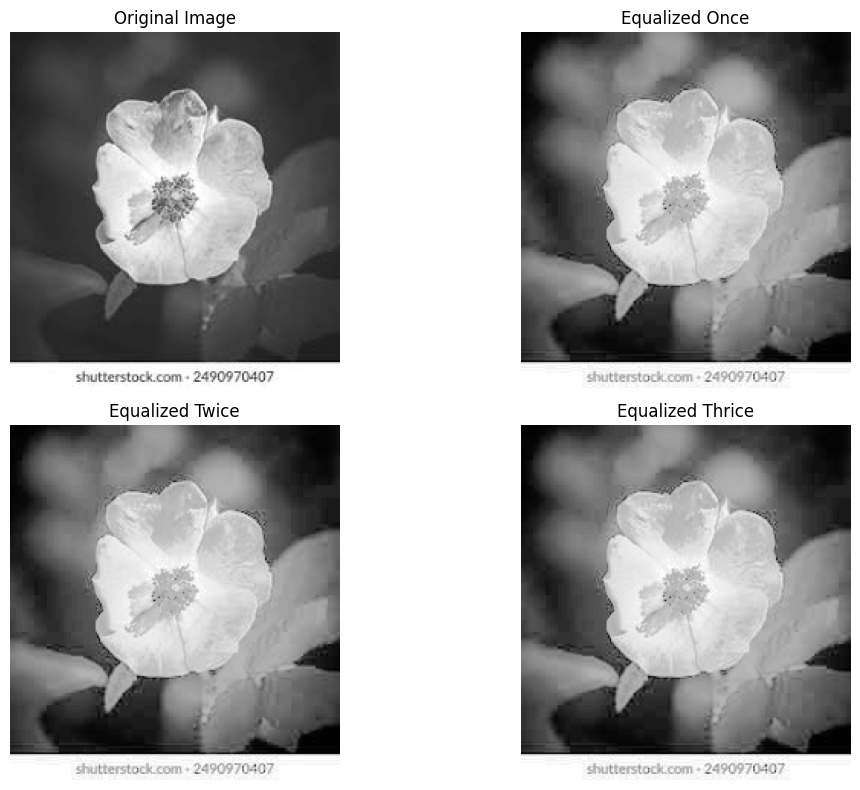

In [ ]:
equalized_once = cv2.equalizeHist(image)
equalized_twice = cv2.equalizeHist(equalized_once)
equalized_thrice = cv2.equalizeHist(equalized_twice)

# Display the images
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Equalized once
plt.subplot(2, 2, 2)
plt.title("Equalized Once")
plt.imshow(equalized_once, cmap='gray')
plt.axis('off')

# Equalized twice
plt.subplot(2, 2, 3)
plt.title("Equalized Twice")
plt.imshow(equalized_twice, cmap='gray')
plt.axis('off')

# Equalized thrice
plt.subplot(2, 2, 4)
plt.title("Equalized Thrice")
plt.imshow(equalized_thrice, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

 After the first equalization, there are no drastic changes in the later equalizations.
Because, the histogram is already tried to make as straight as possible in the first
equalizing step.
